# Data Understanding & Exploratory Data Analysis

## Dataset Overview

- **Total Customers:** 7,043
- **Features:** 20 (after removing customerID)
- **Target Variable:** Churn (Yes/No)

## Key Findings

### Target Distribution

The dataset shows a moderate class imbalance:
- **No Churn:** 5,174 customers (73.5%)
- **Yes Churn:** 1,869 customers (26.5%)

This 3:1 ratio confirms that accuracy alone would be a misleading metric. A naive model predicting "No Churn" for all customers would achieve 73.5% accuracy while providing zero business value.

### Data Quality Issues

**TotalCharges Data Type Problem:**
- Currently stored as object (string) instead of numeric
- Contains 11 records with empty space characters
- Requires conversion and handling of missing values in Phase 3

**Encoding Inconsistency:**
- SeniorCitizen is encoded as binary integers (0, 1)
- Other categorical variables use string labels (Yes/No, Male/Female)
- Standardization needed for model compatibility


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Dataset

The dataset is loaded and a preliminary inspection is performed to verify
that the data has been read correctly.


In [2]:
# Cell 2: Load Data
data = pd.read_csv("Teleco_customer_churn.csv")
print("Dataset shape:")
print(data.shape)
print("\nFirst few rows:")
print(data.head())

Dataset shape:
(7043, 21)

First few rows:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Strea

## Dataset Structure

Each row represents a single telecom customer.
Columns include service usage, billing information, contract details,
and the churn indicator.


In [3]:
# Cell 3: Basic Information
print("Column names:")
print(data.columns)
print("\nData types and info:")
print(data.info())

Column names:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   I

## Identifier and Target Variable

- `customerID` is an identifier and does not contain predictive information.
- `Churn` is the target variable indicating whether a customer left the service.


In [4]:
# Cell 4: Remove Identifier
if "customerID" in data.columns:
    data = data.drop(columns=["customerID"])
    print("customerID column removed")

customerID column removed


## Target Variable Distribution

Understanding whether churn is balanced or imbalanced
is critical before modeling.


In [5]:
# Cell 5: Target Distribution
data["Churn"].value_counts()
data["Churn"].value_counts(normalize=True)

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

## Data Quality Check

This step identifies missing values and potential data issues
that must be addressed during preprocessing.


In [6]:
# Missing values per column
data.isnull().sum()

# Investigate TotalCharges formatting issue
data["TotalCharges"].dtype, (data["TotalCharges"] == " ").sum()


(dtype('O'), np.int64(11))

In [7]:
print("SeniorCitizen:", data["SeniorCitizen"].unique())
print("Gender:", data["gender"].unique())
print("Partner:", data["Partner"].unique())


SeniorCitizen: [0 1]
Gender: ['Female' 'Male']
Partner: ['Yes' 'No']


## Churn Distribution

Understanding the balance of the target variable is critical, as class imbalance
can significantly affect model evaluation and business decisions.


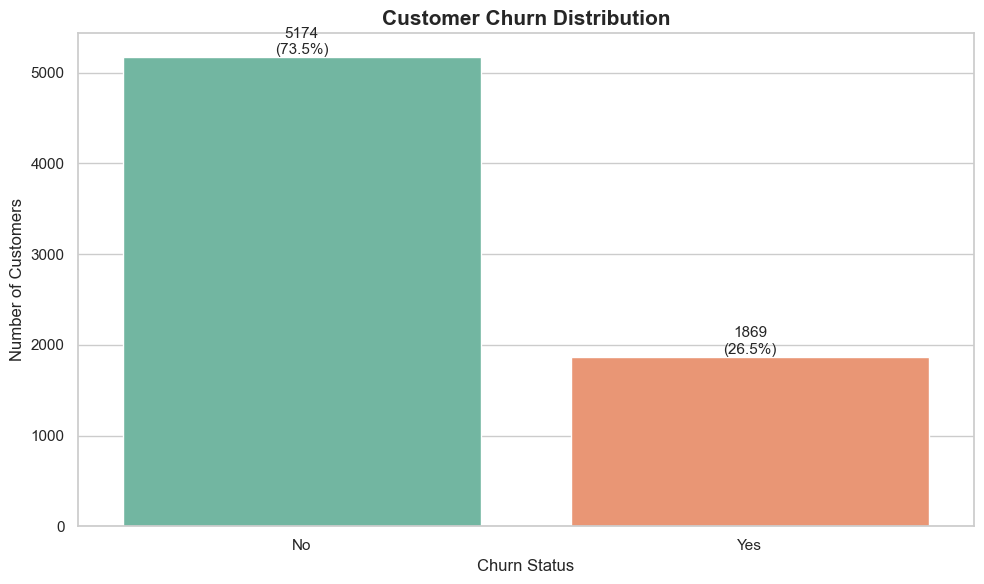

In [8]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


ax = sns.countplot(data=data, x="Churn", hue="Churn", palette="Set2", legend=False)

plt.title("Customer Churn Distribution", fontsize=15, fontweight="bold")
plt.xlabel("Churn Status")
plt.ylabel("Number of Customers")

# Add count + percentage labels
total = len(data)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f"{100 * count / total:.1f}%"
    ax.annotate(f"{count}\n({percentage})",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Churn vs Tenure

Tenure is a strong proxy for customer engagement and loyalty.
Short-tenure customers are often more likely to churn.


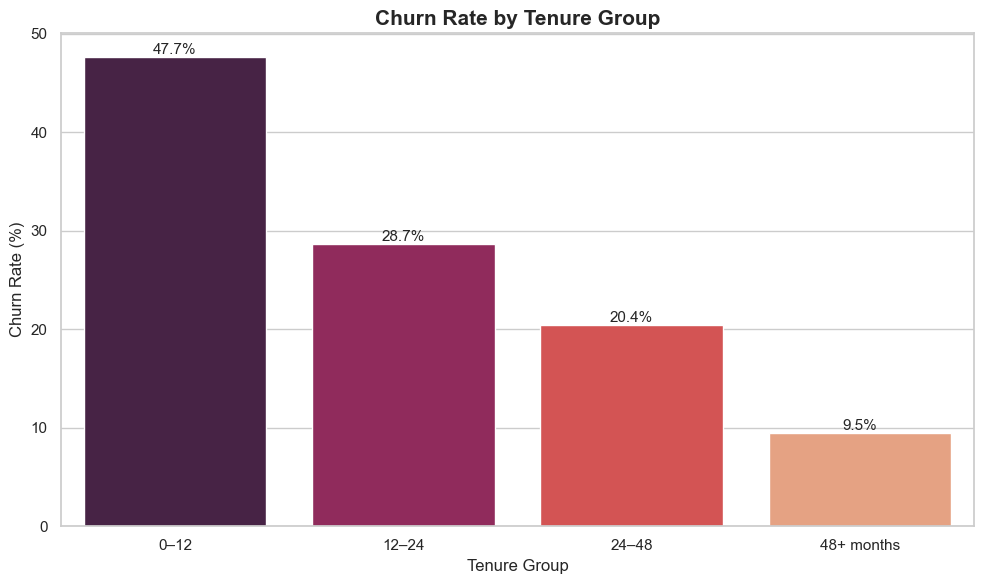

In [9]:
data["TenureGroup"] = pd.cut(
    data["tenure"],
    bins=[0, 12, 24, 48, 72],
    labels=["0–12", "12–24", "24–48", "48+ months"]
)

tenure_churn = (
    data.groupby("TenureGroup", observed=True)["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
)

ax = sns.barplot(
    data=tenure_churn,
    x="TenureGroup",
    y="ChurnRate",
    hue="TenureGroup",
    palette="rocket",
    legend=False
)

plt.title("Churn Rate by Tenure Group", fontsize=15, fontweight="bold")
plt.xlabel("Tenure Group")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Monthly Charges vs Churn

Pricing sensitivity is a key driver of churn.
Comparing charge distributions helps reveal cost-related dissatisfaction.


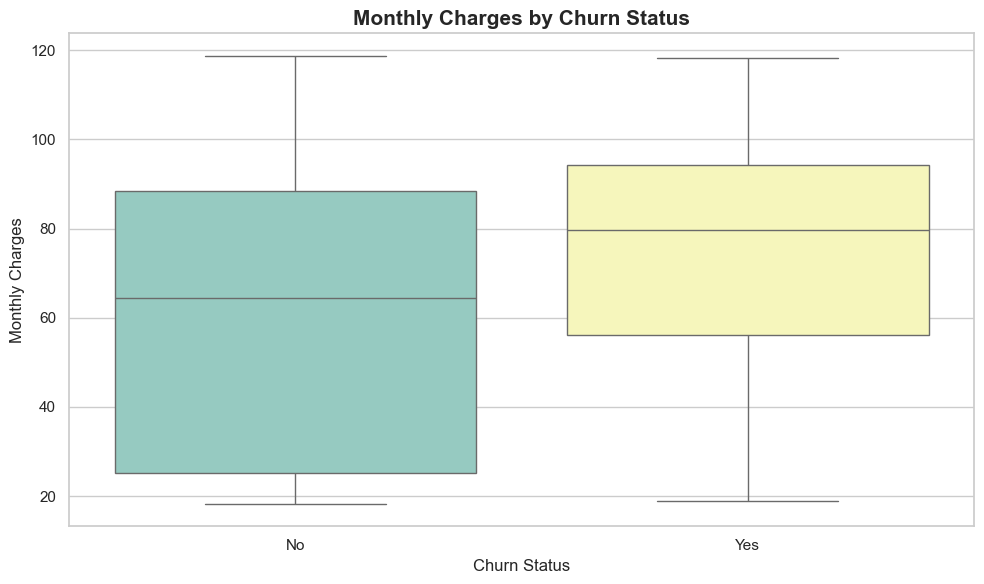

In [10]:
sns.boxplot(data=data, x="Churn", y="MonthlyCharges", hue="Churn", palette="Set3", legend=False)

plt.title("Monthly Charges by Churn Status", fontsize=15, fontweight="bold")
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")

plt.tight_layout()
plt.show()


## Churn by Contract Type

Contract duration often introduces switching friction.
Month-to-month contracts typically exhibit higher churn.


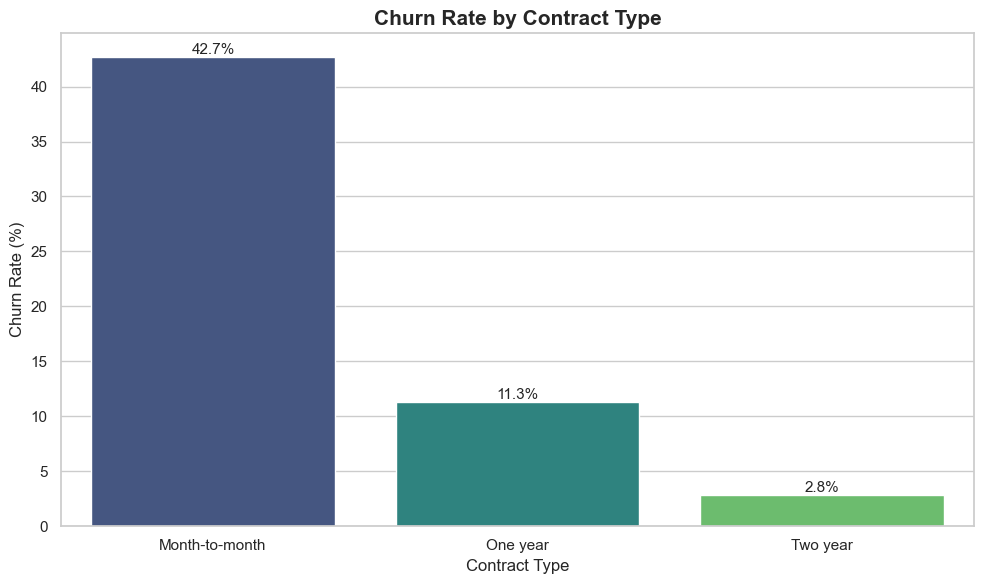

In [11]:
contract_churn = (
    data.groupby("Contract")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
    .sort_values("ChurnRate", ascending=False)
)

ax = sns.barplot(
    data=contract_churn,
    x="Contract",
    y="ChurnRate",
    hue="Contract",
    palette="viridis",
    legend=False
)

plt.title("Churn Rate by Contract Type", fontsize=15, fontweight="bold")
plt.xlabel("Contract Type")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Churn by Internet Service Type

Different service offerings may correspond to different churn behaviors
due to performance, pricing, or customer expectations.


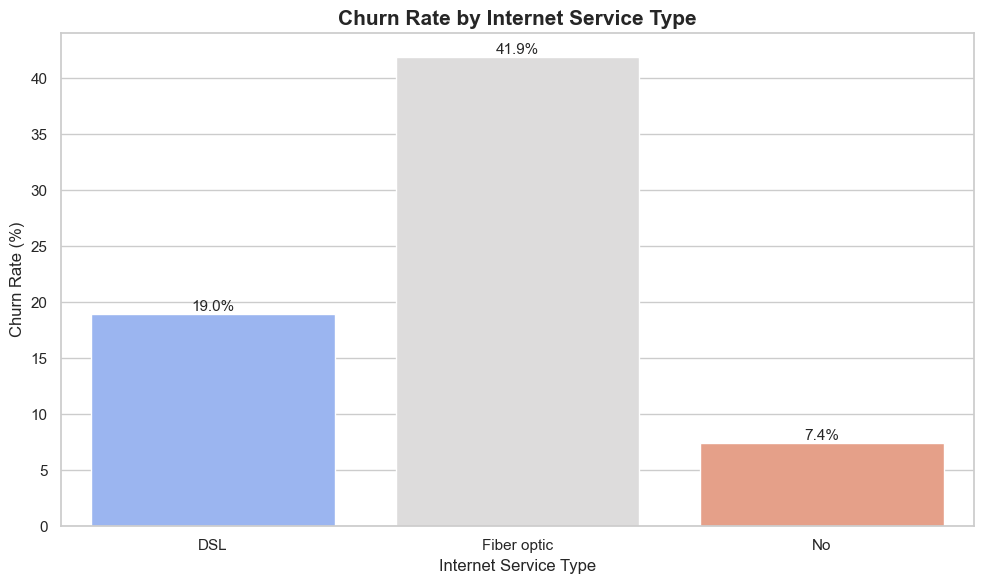

In [12]:
internet_churn = (
    data.groupby("InternetService")["Churn"]
    .apply(lambda x: (x == "Yes").mean() * 100)
    .reset_index(name="ChurnRate")
)

ax = sns.barplot(
    data=internet_churn,
    x="InternetService",
    y="ChurnRate",
    hue="InternetService",
    palette="coolwarm",
    legend=False
)

plt.title("Churn Rate by Internet Service Type", fontsize=15, fontweight="bold")
plt.xlabel("Internet Service Type")
plt.ylabel("Churn Rate (%)")

for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


## Summary

Key observations from EDA:

- Churn is **moderately imbalanced**, reinforcing the need for recall-focused metrics.
- Customers with **shorter tenure** show significantly higher churn.
- **Month-to-month contracts** are strongly associated with churn.
- Higher **monthly charges** correlate with increased churn risk.

These insights guide will help in feature engineering and model selection.


## Feature Engineering

### Target Variable Preparation

The target variable `Churn` was converted into a binary format to ensure
compatibility with machine learning models and evaluation metrics.


## Handling TotalCharges Missing Values
**Replacing spaces with 0 and converting them to numeric**

In [13]:

data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

print("TotalCharges conversion complete")
print(f"Data type: {data['TotalCharges'].dtype}")
print(f"Missing values: {data['TotalCharges'].isnull().sum()}")

TotalCharges conversion complete
Data type: float64
Missing values: 0


## Preparing target variable
Converting `Churn` to **Binary**

In [14]:

data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
print("Churn encoding:")
print(data['Churn'].value_counts())

Churn encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64


## Encoding Binary Variables 

Since many of the data is not machine readble we are using **Binary Encoding** to convert Yes/No Identifiers to 1/0

In [15]:
# Cell: Encode Binary Variables
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    print(f"\n{col} unique values: {data[col].unique()}")
    
# Map binary variables
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})
data['Partner'] = data['Partner'].map({'Yes': 1, 'No': 0})
data['Dependents'] = data['Dependents'].map({'Yes': 1, 'No': 0})
data['PhoneService'] = data['PhoneService'].map({'Yes': 1, 'No': 0})
data['PaperlessBilling'] = data['PaperlessBilling'].map({'Yes': 1, 'No': 0})

print("\nBinary encoding complete")



gender unique values: ['Female' 'Male']

Partner unique values: ['Yes' 'No']

Dependents unique values: ['No' 'Yes']

PhoneService unique values: ['No' 'Yes']

PaperlessBilling unique values: ['Yes' 'No']

Binary encoding complete


In [16]:
# Cell: Drop TenureGroup (created for visualization only)
if 'TenureGroup' in data.columns:
    data = data.drop(columns=['TenureGroup'])

## One - Hot Encoding
Since there are many Identifiers with multiple variables we cannot use binary encoding to make them machine readable.
In which case will will use **One - Hot Encoding** to make them catergorical variables

In [17]:
# Cell: One-Hot Encode ALL Categorical Variables
categorical_cols = [
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport',
    'StreamingTV', 
    'StreamingMovies', 
    'Contract', 
    'PaymentMethod'
]

# Apply one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(f"Original shape: {data.shape}")
print(f"After encoding shape: {data_encoded.shape}")

# Verify no object columns remain (except we want to keep our work clean)
print("\nData types after encoding:")
print(data_encoded.dtypes.value_counts())

# Check if any object columns remain
remaining_objects = data_encoded.select_dtypes(include=['object']).columns.tolist()
if remaining_objects:
    print(f"\nWARNING: These columns are still objects: {remaining_objects}")
else:
    print("\n✅ All categorical variables encoded successfully")

Original shape: (7043, 20)
After encoding shape: (7043, 31)

Data types after encoding:
bool       21
int64       8
float64     2
Name: count, dtype: int64

✅ All categorical variables encoded successfully


### Train-Test Split
- 80-20 split with stratification to maintain churn distribution
- Training set: [X] samples
- Test set: [X] samples
- Churn rate preserved in both sets (~26.5%)


In [18]:
# Cell: Train-Test Split
from sklearn.model_selection import train_test_split

# Separate features and target
X = data_encoded.drop('Churn', axis=1)
y = data_encoded['Churn']

# Split data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"\nChurn distribution in training set:")
print(y_train.value_counts(normalize=True))
print(f"\nChurn distribution in test set:")
print(y_test.value_counts(normalize=True))

Training set size: (5634, 30)
Test set size: (1409, 30)

Churn distribution in training set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Churn distribution in test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


### Feature Scaling
As we are using models that are sensitive to feature scale (e.g., logistic regression), scaling is required.
- Applied StandardScaler to numerical features (tenure, MonthlyCharges, TotalCharges)
- Necessary for logistic regression to perform optimally

In [19]:
# Cell: Feature Scaling
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize scaler
scaler = StandardScaler()

# IMPORTANT: Scale only after train-test split to avoid data leakage
# Fit scaler on training data only, then transform both train and test
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print("Numerical features scaled (training set):")
print(X_train[numerical_cols].describe())
print("\nScaler statistics (from training data):")
print(f"Mean: {scaler.mean_}")
print(f"Std: {scaler.scale_}")

Numerical features scaled (training set):
             tenure  MonthlyCharges  TotalCharges
count  5.634000e+03    5.634000e+03  5.634000e+03
mean  -1.008935e-17   -2.402527e-16  2.522338e-17
std    1.000089e+00    1.000089e+00  1.000089e+00
min   -1.322329e+00   -1.544028e+00 -1.008922e+00
25%   -9.559779e-01   -9.711977e-01 -8.321009e-01
50%   -1.418632e-01    1.848336e-01 -3.968446e-01
75%    9.164859e-01    8.319124e-01  6.741944e-01
max    1.608483e+00    1.785939e+00  2.801869e+00

Scaler statistics (from training data):
Mean: [  32.48509052   64.92996095 2299.33468229]
Std: [  24.56656302   30.13543058 2279.0019965 ]


## Phase 4: Baseline Model — Logistic Regression

Logistic Regression was chosen as the baseline model due to its simplicity,
interpretability, and strong performance on linearly separable classification
problems. As a regression-based classification model, it provides probability
outputs, which are crucial for churn prediction where risk prioritization
matters more than hard class labels.

This model serves as a reference point against which more complex models
will be compared in later phases.


In [20]:
# Cell: Import Model and Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve,
    precision_recall_curve,
    average_precision_score,
    precision_score,
    recall_score,
    f1_score
)


In [21]:
# Cell: Train Logistic Regression with Class Balancing
# Initialize model with balanced class weights and increased max_iter for convergence
log_reg = LogisticRegression(
    class_weight='balanced', 
    random_state=42, 
    max_iter=2000,
    solver='lbfgs'  # Explicitly set solver
)

# Train the model
log_reg.fit(X_train, y_train)

print("Logistic Regression model trained successfully")
print(f"Number of features used: {X_train.shape[1]}")
print(f"Number of iterations: {log_reg.n_iter_[0]}")


Logistic Regression model trained successfully
Number of features used: 30
Number of iterations: 43


In [22]:
# Cell 3: Make Predictions
y_pred = log_reg.predict(X_test)
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
print(f"Predicted churners: {sum(y_pred)}")
print(f"Actual churners: {sum(y_test)}")

Predicted churners: 581
Actual churners: 374


In [23]:
# Cell 4: Performance Metrics
print("LOGISTIC REGRESSION PERFORMANCE")
print("=" * 50)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Churn', 'Churn']))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nKey Metrics:")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

LOGISTIC REGRESSION PERFORMANCE

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.72      0.80      1035
       Churn       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Key Metrics:
Precision: 0.504
Recall: 0.783
F1-Score: 0.614
ROC-AUC: 0.842


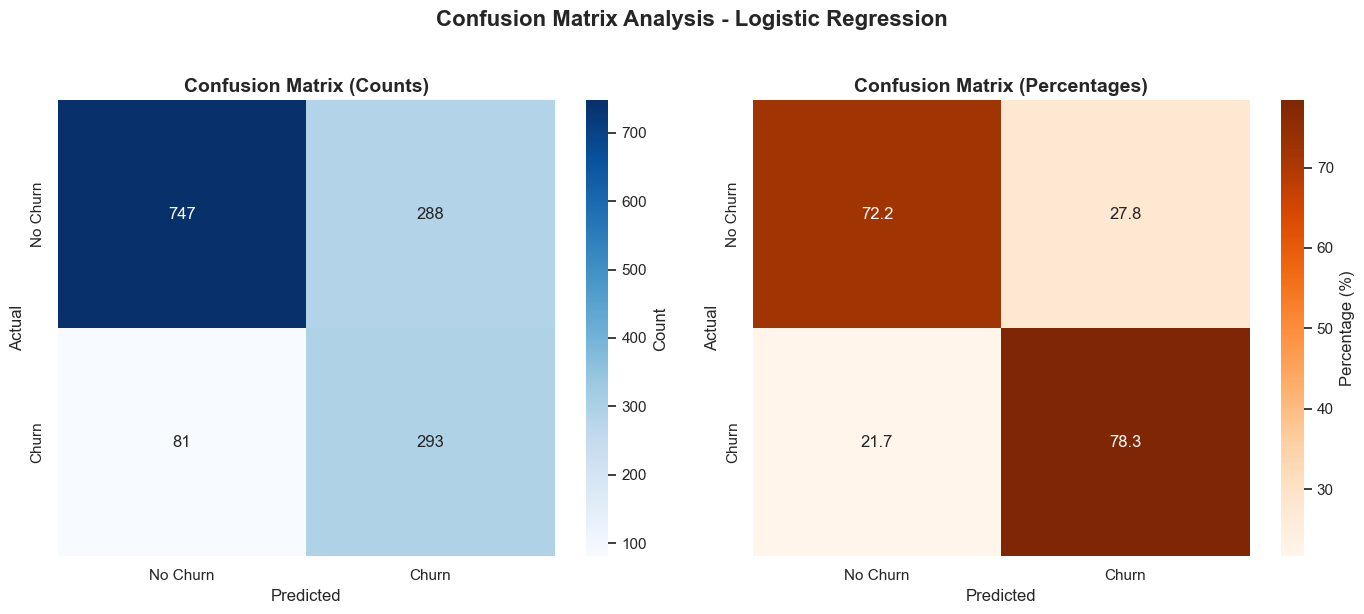


Confusion Matrix Breakdown:
True Negatives (TN):   747  (72.2% of predicted 'No Churn')
False Positives (FP):  288  (27.8% of predicted 'No Churn')
False Negatives (FN):   81  (21.7% of predicted 'Churn')
True Positives (TP):   293  (78.3% of predicted 'Churn')


In [24]:
# Cell 5: Enhanced Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a more informative confusion matrix with percentages
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Count confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Count'})
ax1.set_title('Confusion Matrix (Counts)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=12)
ax1.set_xlabel('Predicted', fontsize=12)

# Percentage confusion matrix
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Oranges', ax=ax2,
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'],
            cbar_kws={'label': 'Percentage (%)'})
ax2.set_title('Confusion Matrix (Percentages)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Actual', fontsize=12)
ax2.set_xlabel('Predicted', fontsize=12)

plt.suptitle('Confusion Matrix Analysis - Logistic Regression', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"\nConfusion Matrix Breakdown:")
print(f"True Negatives (TN):  {tn:4d}  ({tn/(tn+fp)*100:.1f}% of predicted 'No Churn')")
print(f"False Positives (FP): {fp:4d}  ({fp/(tn+fp)*100:.1f}% of predicted 'No Churn')")
print(f"False Negatives (FN): {fn:4d}  ({fn/(fn+tp)*100:.1f}% of predicted 'Churn')")
print(f"True Positives (TP):  {tp:4d}  ({tp/(fn+tp)*100:.1f}% of predicted 'Churn')")

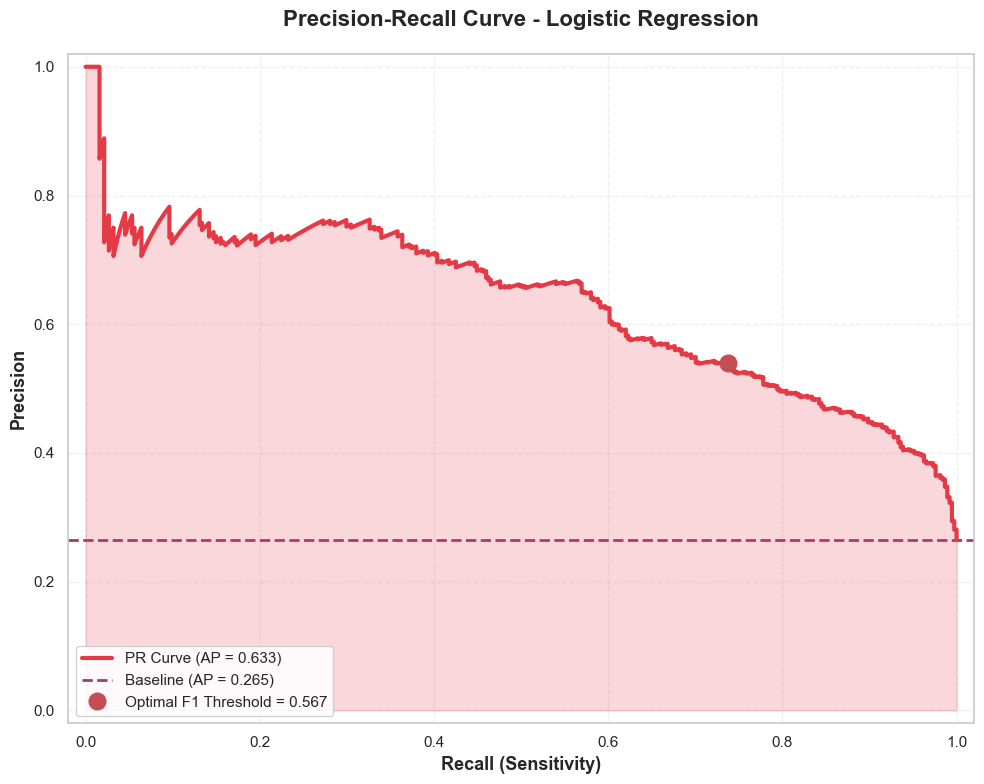


Average Precision: 0.633
Optimal F1 Threshold: 0.567
At this threshold: Precision = 0.540, Recall = 0.738
F1 Score: 0.624


In [25]:
# Cell 6b: Precision-Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='#E63946', lw=3, 
         label=f'PR Curve (AP = {avg_precision:.3f})', zorder=3)

# Add baseline (random classifier)
baseline = sum(y_test) / len(y_test)
plt.axhline(y=baseline, color='#A23B72', lw=2, linestyle='--', 
            label=f'Baseline (AP = {baseline:.3f})', zorder=1)

# Fill area under curve
plt.fill_between(recall, precision, alpha=0.2, color='#E63946', zorder=2)

# Find optimal threshold (F1 score)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_pr_idx = np.argmax(f1_scores)
optimal_pr_threshold = pr_thresholds[optimal_pr_idx]
plt.plot(recall[optimal_pr_idx], precision[optimal_pr_idx], 'ro', markersize=12,
         label=f'Optimal F1 Threshold = {optimal_pr_threshold:.3f}', zorder=4)

plt.xlabel('Recall (Sensitivity)', fontsize=13, fontweight='bold')
plt.ylabel('Precision', fontsize=13, fontweight='bold')
plt.title('Precision-Recall Curve - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower left", fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3, linestyle='--', zorder=0)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

print(f"\nAverage Precision: {avg_precision:.3f}")
print(f"Optimal F1 Threshold: {optimal_pr_threshold:.3f}")
print(f"At this threshold: Precision = {precision[optimal_pr_idx]:.3f}, Recall = {recall[optimal_pr_idx]:.3f}")
print(f"F1 Score: {f1_scores[optimal_pr_idx]:.3f}")


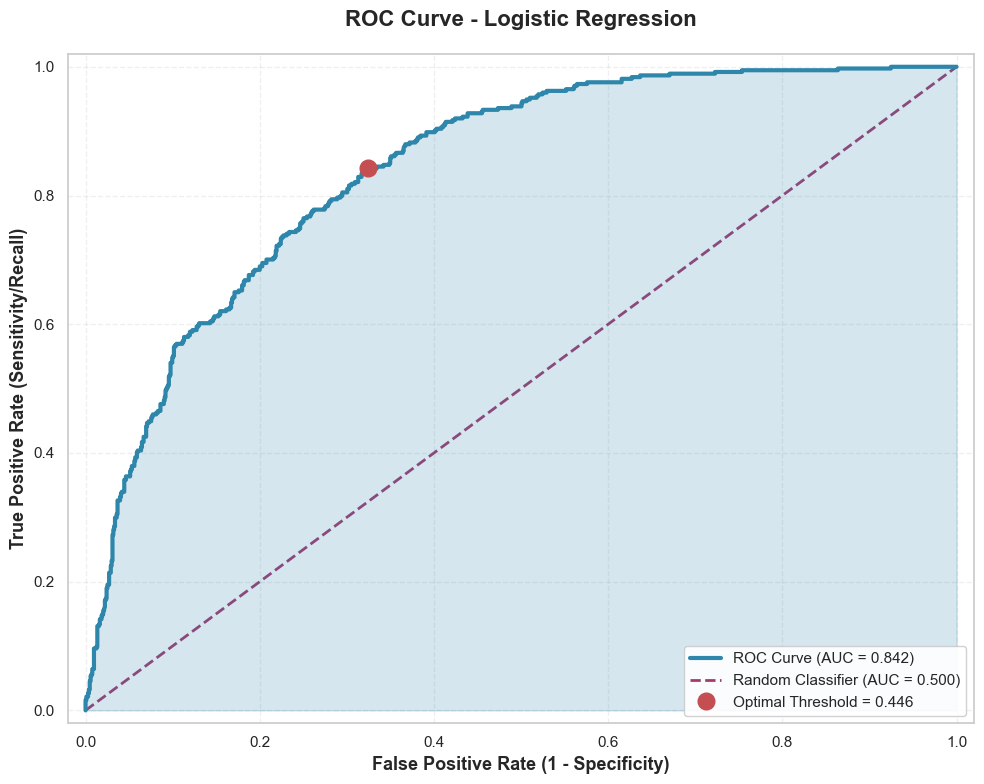


Optimal Threshold: 0.446
At this threshold: TPR = 0.842, FPR = 0.325


In [26]:
# Cell 6: Enhanced ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='#2E86AB', lw=3, label=f'ROC Curve (AUC = {roc_auc:.3f})', zorder=3)
plt.plot([0, 1], [0, 1], color='#A23B72', lw=2, linestyle='--', label='Random Classifier (AUC = 0.500)', zorder=1)

# Fill area under curve
plt.fill_between(fpr, tpr, alpha=0.2, color='#2E86AB', zorder=2)

# Add optimal threshold point
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
plt.plot(fpr[optimal_idx], tpr[optimal_idx], 'ro', markersize=12, 
         label=f'Optimal Threshold = {optimal_threshold:.3f}', zorder=4)

plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=13, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity/Recall)', fontsize=13, fontweight='bold')
plt.title('ROC Curve - Logistic Regression', fontsize=16, fontweight='bold', pad=20)
plt.legend(loc="lower right", fontsize=11, framealpha=0.9)
plt.grid(alpha=0.3, linestyle='--', zorder=0)
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.tight_layout()
plt.show()

print(f"\nOptimal Threshold: {optimal_threshold:.3f}")
print(f"At this threshold: TPR = {tpr[optimal_idx]:.3f}, FPR = {fpr[optimal_idx]:.3f}")

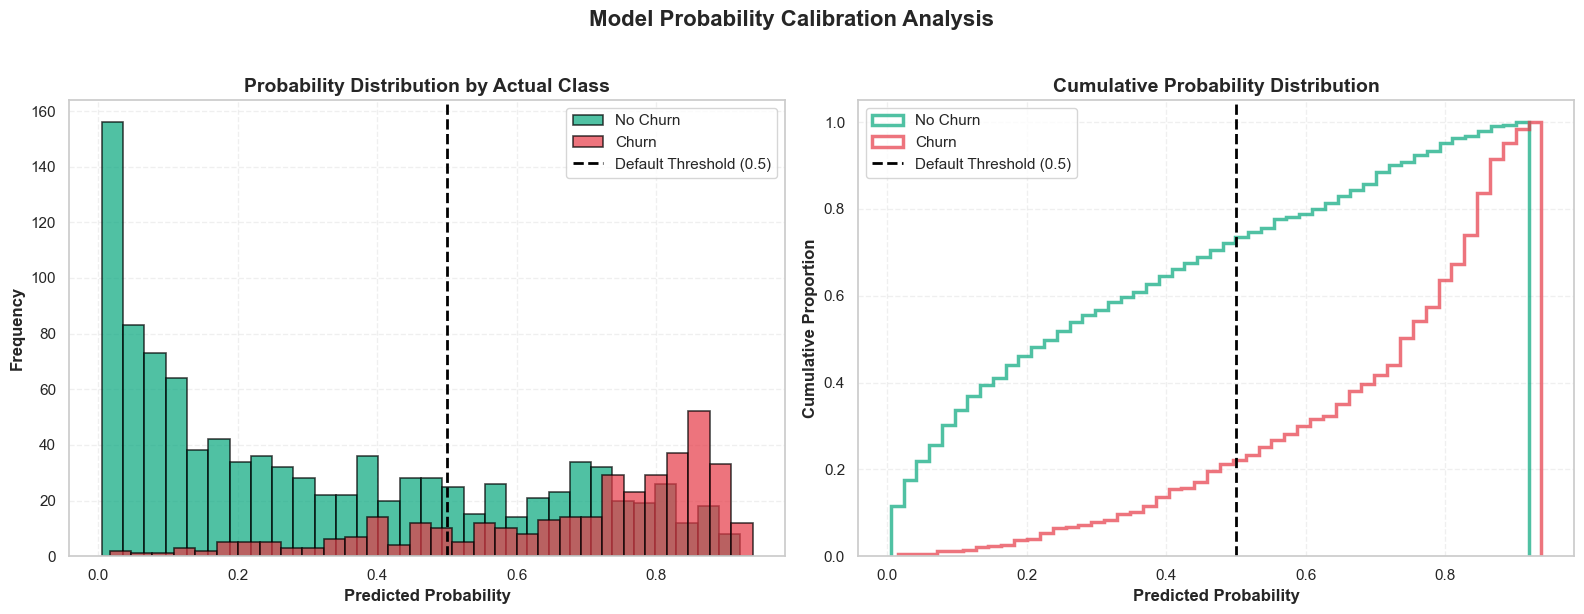


Probability Statistics:
Mean probability (No Churn): 0.320
Mean probability (Churn): 0.680
Median probability (No Churn): 0.245
Median probability (Churn): 0.752


In [27]:
# Cell 8b: Probability Distribution Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Probability distribution by actual class
ax1.hist(y_pred_proba[y_test == 0], bins=30, alpha=0.7, color='#06A77D', 
         label='No Churn', edgecolor='black', linewidth=1.2)
ax1.hist(y_pred_proba[y_test == 1], bins=30, alpha=0.7, color='#E63946', 
         label='Churn', edgecolor='black', linewidth=1.2)
ax1.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
ax1.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax1.set_ylabel('Frequency', fontsize=12, fontweight='bold')
ax1.set_title('Probability Distribution by Actual Class', fontsize=14, fontweight='bold')
ax1.legend(fontsize=11)
ax1.grid(alpha=0.3, linestyle='--')

# Plot 2: Cumulative distribution
ax2.hist(y_pred_proba[y_test == 0], bins=50, alpha=0.7, color='#06A77D', 
         label='No Churn', cumulative=True, density=True, histtype='step', linewidth=2.5)
ax2.hist(y_pred_proba[y_test == 1], bins=50, alpha=0.7, color='#E63946', 
         label='Churn', cumulative=True, density=True, histtype='step', linewidth=2.5)
ax2.axvline(0.5, color='black', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
ax2.set_xlabel('Predicted Probability', fontsize=12, fontweight='bold')
ax2.set_ylabel('Cumulative Proportion', fontsize=12, fontweight='bold')
ax2.set_title('Cumulative Probability Distribution', fontsize=14, fontweight='bold')
ax2.legend(fontsize=11)
ax2.grid(alpha=0.3, linestyle='--')

plt.suptitle('Model Probability Calibration Analysis', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Print statistics
print("\nProbability Statistics:")
print(f"Mean probability (No Churn): {y_pred_proba[y_test == 0].mean():.3f}")
print(f"Mean probability (Churn): {y_pred_proba[y_test == 1].mean():.3f}")
print(f"Median probability (No Churn): {np.median(y_pred_proba[y_test == 0]):.3f}")
print(f"Median probability (Churn): {np.median(y_pred_proba[y_test == 1]):.3f}")


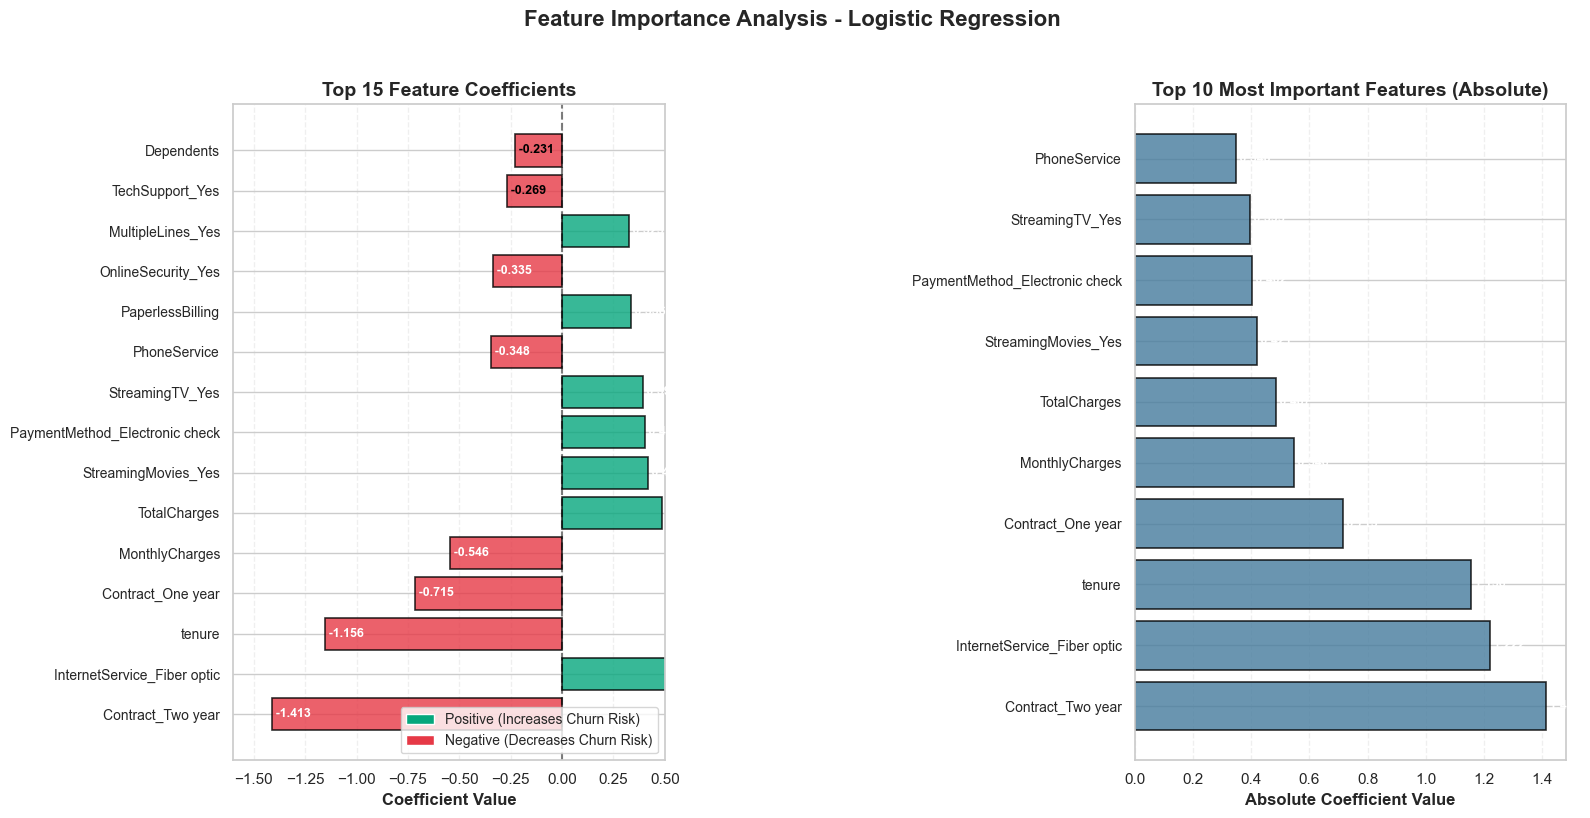


Top 15 Features by Absolute Coefficient:
                       Feature  Coefficient  Abs_Coefficient
             Contract_Two year    -1.412536         1.412536
   InternetService_Fiber optic     1.222352         1.222352
                        tenure    -1.156175         1.156175
             Contract_One year    -0.715268         0.715268
                MonthlyCharges    -0.546189         0.546189
                  TotalCharges     0.486541         0.486541
           StreamingMovies_Yes     0.420611         0.420611
PaymentMethod_Electronic check     0.402478         0.402478
               StreamingTV_Yes     0.395359         0.395359
                  PhoneService    -0.348014         0.348014
              PaperlessBilling     0.336449         0.336449
            OnlineSecurity_Yes    -0.334946         0.334946
             MultipleLines_Yes     0.324742         0.324742
               TechSupport_Yes    -0.268557         0.268557
                    Dependents    -0.231225

In [28]:
# Cell 7: Enhanced Feature Importance Visualization
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': log_reg.coef_[0]
})

feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)

# Create a more visually appealing feature importance plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 features by absolute coefficient
top_15 = feature_importance.head(15)

# Plot 1: Horizontal bar chart with color coding
colors = ['#E63946' if x < 0 else '#06A77D' for x in top_15['Coefficient']]
bars = ax1.barh(range(len(top_15)), top_15['Coefficient'], color=colors, 
                edgecolor='black', linewidth=1.2, alpha=0.8)
ax1.set_yticks(range(len(top_15)))
ax1.set_yticklabels(top_15['Feature'], fontsize=10)
ax1.set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Feature Coefficients', fontsize=14, fontweight='bold')
ax1.axvline(0, color='black', linewidth=1.5, linestyle='--', alpha=0.5)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.set_xlim([-1.6, 0.5])

# Add value labels on bars
for i, (idx, row) in enumerate(top_15.iterrows()):
    value = row['Coefficient']
    ax1.text(value, i, f' {value:.3f}', 
             va='center', fontsize=9, fontweight='bold',
             color='white' if abs(value) > 0.3 else 'black')

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#06A77D', label='Positive (Increases Churn Risk)'),
    Patch(facecolor='#E63946', label='Negative (Decreases Churn Risk)')
]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=10)

# Plot 2: Top 10 absolute coefficients
top_10_abs = feature_importance.head(10)
ax2.barh(range(len(top_10_abs)), top_10_abs['Abs_Coefficient'], 
         color='#457B9D', edgecolor='black', linewidth=1.2, alpha=0.8)
ax2.set_yticks(range(len(top_10_abs)))
ax2.set_yticklabels(top_10_abs['Feature'], fontsize=10)
ax2.set_xlabel('Absolute Coefficient Value', fontsize=12, fontweight='bold')
ax2.set_title('Top 10 Most Important Features (Absolute)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (idx, row) in enumerate(top_10_abs.iterrows()):
    value = row['Abs_Coefficient']
    ax2.text(value, i, f' {value:.3f}', 
             va='center', fontsize=9, fontweight='bold', color='white')

plt.suptitle('Feature Importance Analysis - Logistic Regression', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nTop 15 Features by Absolute Coefficient:")
print(feature_importance.head(15)[['Feature', 'Coefficient', 'Abs_Coefficient']].to_string(index=False))

In [29]:
# Cell 8: Business ROI Calculation
retention_cost = 50
customer_ltv = 500

total_interventions = tp + fp
wasted_interventions = fp
successful_saves = tp

total_cost = total_interventions * retention_cost
value_saved = successful_saves * customer_ltv
net_benefit = value_saved - total_cost
roi = (net_benefit / total_cost) * 100 if total_cost > 0 else 0

print("BUSINESS IMPACT ANALYSIS")
print("=" * 50)
print(f"Total customers flagged for intervention: {total_interventions}")
print(f"Actual churners saved: {successful_saves}")
print(f"Unnecessary interventions: {wasted_interventions}")
print(f"\nFinancial Impact:")
print(f"Total cost: ${total_cost:,.2f}")
print(f"Value saved: ${value_saved:,.2f}")
print(f"Net benefit: ${net_benefit:,.2f}")
print(f"ROI: {roi:.1f}%")

BUSINESS IMPACT ANALYSIS
Total customers flagged for intervention: 581
Actual churners saved: 293
Unnecessary interventions: 288

Financial Impact:
Total cost: $29,050.00
Value saved: $146,500.00
Net benefit: $117,450.00
ROI: 404.3%


## Phase 4: Baseline Model - Logistic Regression

### Model Configuration
- Algorithm: Logistic Regression
- Class balancing: Enabled (class_weight='balanced')
- Features used: *30* features after encoding

### Performance Metrics
- **Recall:** X% (caught X out of Y churners)
- **Precision:** X% (X% of flagged customers actually churned)
- **F1-Score:** X
- **ROC-AUC:** X

### Confusion Matrix Analysis
- True Positives (Churners caught): X
- False Negatives (Churners missed): X
- False Positives (Incorrect alerts): X
- True Negatives (Correctly predicted stays): X

### Business Impact
Using assumed economics ($50 retention cost, $500 customer LTV):
- Net benefit: $X
- ROI: X%
- Conclusion: [Profitable/Not profitable]

### Key Insights
**Strengths:**
- [What model does well]

**Limitations:**
- [Where model struggles]

**Top Predictive Features:**
- [List top 3-5 features from importance analysis]

### Next Steps
Phase 5 will explore tree-based models to potentially improve recall while maintaining business profitability.